In [1]:
import numpy as np
import cv2
import random

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from matplotlib import pyplot

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

In [43]:
lim = 1000
cover_fnames = sorted(glob.glob('../Cover/*.jpg'))
cover_fnames = cover_fnames[:lim]
juniward_fnames = sorted(glob.glob('../JUNIWARD/*.jpg'))
juniward_fnames = juniward_fnames[:lim]
jmipod_fnames = sorted(glob.glob('../JMiPOD/*.jpg'))
jmipod_fnames = jmipod_fnames[:lim]
uerd_fnames = sorted(glob.glob('../UERD/*.jpg'))
uerd_fnames = uerd_fnames[:lim]

In [44]:
from sklearn.svm import SVC

In [45]:
from helper import *
from jpeg2dct.numpy import load, loads

In [46]:
T = 5
jump = 1
X_train = []
X_test = []
y_train = []
y_test = []
train_test_split_ = 800

for index, fname in enumerate(cover_fnames):
    img = cv2.imread(fname, 0)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
#     # get the Y 
#     img = img[:,:,0]
    img = img.astype(int)

#     dct_y, dct_cb, dct_cr = load(fname)
#     img = np.zeros((512, 512))
#     for i in range(dct_y.shape[0]):
#         for j in range(dct_y.shape[1]):
#             img[i*8:(i+1)*8, j*8:(j+1)*8] += dct_y[i][j].reshape(8, 8)
            
#     img = img.astype(int)

    Dh_cover, Dv_cover, Dd_cover = count_to_transition(SPAM_Dh_count(img, jump, T)), \
    count_to_transition(SPAM_Dv_count(img, jump, T)), count_to_transition(SPAM_Dd_count(img, jump, jump, T))
    hold = np.append(Dh_cover.ravel(), Dv_cover.ravel())    
    hold = np.append(hold, Dd_cover.ravel())
    
    if index < train_test_split_:
        X_train.append(hold)
        y_train.append(1)
    else:
        X_test.append(hold)
        y_test.append(1)
    if index%50==0:
        print('i: ', index)
    print(fname)
        
print('Done Covers')

for index, fname in enumerate(jmipod_fnames):
    img = cv2.imread(fname, 0)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
#     # get the Y 
#     img = img[:,:,0]
    img = img.astype(int)

#     dct_y, dct_cb, dct_cr = load(fname)
#     img = np.zeros((512, 512))
#     for i in range(dct_y.shape[0]):
#         for j in range(dct_y.shape[1]):
#             img[i*8:(i+1)*8, j*8:(j+1)*8] += dct_y[i][j].reshape(8, 8)
            
#     img = img.astype(int)

    Dh_cover, Dv_cover, Dd_cover = count_to_transition(SPAM_Dh_count(img, jump, T)), \
    count_to_transition(SPAM_Dv_count(img, jump, T)), count_to_transition(SPAM_Dd_count(img, jump, jump, T))
    hold = np.append(Dh_cover.ravel(), Dv_cover.ravel())
    hold = np.append(hold, Dd_cover.ravel())
        
    if index < train_test_split_:
        X_train.append(hold)
        y_train.append(0)
    else:
        X_test.append(hold)
        y_test.append(0)
    if index%50==0:
        print(index)
    print(fname)
        
print('Done U')

i:  0
../Cover/00001.jpg
../Cover/00002.jpg
../Cover/00003.jpg
../Cover/00004.jpg
../Cover/00005.jpg
../Cover/00007.jpg
../Cover/00008.jpg
../Cover/00009.jpg
../Cover/00010.jpg
../Cover/00011.jpg
../Cover/00013.jpg
../Cover/00014.jpg
../Cover/00015.jpg
../Cover/00016.jpg
../Cover/00017.jpg
../Cover/00018.jpg
../Cover/00019.jpg
../Cover/00020.jpg
../Cover/00021.jpg
../Cover/00022.jpg
../Cover/00023.jpg
../Cover/00024.jpg
../Cover/00025.jpg
../Cover/00026.jpg
../Cover/00027.jpg
../Cover/00028.jpg
../Cover/00029.jpg
../Cover/00030.jpg
../Cover/00031.jpg
../Cover/00032.jpg
../Cover/00033.jpg
../Cover/00035.jpg
../Cover/00036.jpg
../Cover/00037.jpg
../Cover/00038.jpg
../Cover/00039.jpg
../Cover/00040.jpg
../Cover/00041.jpg
../Cover/00042.jpg
../Cover/00043.jpg
../Cover/00044.jpg
../Cover/00045.jpg


/home/usman/workspace/Alaska2ImageSteganalysis/model/helper.py:98: RuntimeWarning: invalid value encountered in true_divide
  M = M/M.sum(axis=1)[:,None]


../Cover/00046.jpg
../Cover/00047.jpg
../Cover/00048.jpg
../Cover/00050.jpg
../Cover/00052.jpg
../Cover/00053.jpg
../Cover/00054.jpg
../Cover/00055.jpg
i:  50
../Cover/00056.jpg
../Cover/00057.jpg
../Cover/00058.jpg
../Cover/00059.jpg
../Cover/00060.jpg
../Cover/00061.jpg
../Cover/00062.jpg
../Cover/00064.jpg
../Cover/00065.jpg
../Cover/00066.jpg
../Cover/00067.jpg
../Cover/00068.jpg
../Cover/00069.jpg
../Cover/00070.jpg
../Cover/00071.jpg
../Cover/00072.jpg
../Cover/00073.jpg
../Cover/00074.jpg
../Cover/00075.jpg
../Cover/00076.jpg
../Cover/00077.jpg
../Cover/00078.jpg
../Cover/00079.jpg
../Cover/00081.jpg
../Cover/00082.jpg
../Cover/00083.jpg
../Cover/00084.jpg
../Cover/00085.jpg
../Cover/00086.jpg
../Cover/00087.jpg
../Cover/00088.jpg
../Cover/00089.jpg
../Cover/00090.jpg
../Cover/00091.jpg
../Cover/00092.jpg
../Cover/00094.jpg
../Cover/00095.jpg
../Cover/00096.jpg
../Cover/00097.jpg
../Cover/00099.jpg
../Cover/00100.jpg
../Cover/00101.jpg
../Cover/00102.jpg
../Cover/00103.jpg
../Co

../Cover/00510.jpg
../Cover/00511.jpg
../Cover/00512.jpg
../Cover/00513.jpg
../Cover/00514.jpg
../Cover/00515.jpg
../Cover/00516.jpg
../Cover/00517.jpg
../Cover/00518.jpg
../Cover/00519.jpg
../Cover/00520.jpg
../Cover/00521.jpg
../Cover/00522.jpg
../Cover/00524.jpg
../Cover/00525.jpg
../Cover/00526.jpg
../Cover/00527.jpg
../Cover/00529.jpg
../Cover/00530.jpg
../Cover/00531.jpg
../Cover/00533.jpg
../Cover/00534.jpg
../Cover/00535.jpg
../Cover/00536.jpg
../Cover/00537.jpg
../Cover/00538.jpg
../Cover/00539.jpg
../Cover/00540.jpg
../Cover/00541.jpg
../Cover/00542.jpg
i:  500
../Cover/00543.jpg
../Cover/00544.jpg
../Cover/00545.jpg
../Cover/00546.jpg
../Cover/00547.jpg
../Cover/00549.jpg
../Cover/00550.jpg
../Cover/00551.jpg
../Cover/00552.jpg
../Cover/00553.jpg
../Cover/00554.jpg
../Cover/00555.jpg
../Cover/00556.jpg
../Cover/00557.jpg
../Cover/00558.jpg
../Cover/00559.jpg
../Cover/00560.jpg
../Cover/00561.jpg
../Cover/00562.jpg
../Cover/00563.jpg
../Cover/00564.jpg
../Cover/00566.jpg
../C

../Cover/00974.jpg
../Cover/00975.jpg
i:  900
../Cover/00977.jpg
../Cover/00978.jpg
../Cover/00979.jpg
../Cover/00980.jpg
../Cover/00981.jpg
../Cover/00983.jpg
../Cover/00985.jpg
../Cover/00986.jpg
../Cover/00987.jpg
../Cover/00988.jpg
../Cover/00989.jpg
../Cover/00990.jpg
../Cover/00991.jpg
../Cover/00992.jpg
../Cover/00993.jpg
../Cover/00994.jpg
../Cover/00995.jpg
../Cover/00996.jpg
../Cover/00997.jpg
../Cover/00998.jpg
../Cover/00999.jpg
../Cover/01000.jpg
../Cover/01001.jpg
../Cover/01002.jpg
../Cover/01003.jpg
../Cover/01004.jpg
../Cover/01005.jpg
../Cover/01007.jpg
../Cover/01008.jpg
../Cover/01009.jpg
../Cover/01010.jpg
../Cover/01011.jpg
../Cover/01012.jpg
../Cover/01013.jpg
../Cover/01014.jpg
../Cover/01015.jpg
../Cover/01016.jpg
../Cover/01017.jpg
../Cover/01018.jpg
../Cover/01019.jpg
../Cover/01020.jpg
../Cover/01021.jpg
../Cover/01023.jpg
../Cover/01025.jpg
../Cover/01026.jpg
../Cover/01027.jpg
../Cover/01028.jpg
../Cover/01029.jpg
../Cover/01030.jpg
../Cover/01031.jpg
i:  

../JMiPOD/00339.jpg
../JMiPOD/00340.jpg
../JMiPOD/00341.jpg
../JMiPOD/00342.jpg
../JMiPOD/00343.jpg
../JMiPOD/00344.jpg
../JMiPOD/00345.jpg
../JMiPOD/00346.jpg
../JMiPOD/00347.jpg
../JMiPOD/00348.jpg
../JMiPOD/00349.jpg
../JMiPOD/00350.jpg
../JMiPOD/00351.jpg
../JMiPOD/00352.jpg
../JMiPOD/00353.jpg
../JMiPOD/00354.jpg
../JMiPOD/00355.jpg
../JMiPOD/00356.jpg
../JMiPOD/00357.jpg
../JMiPOD/00359.jpg
../JMiPOD/00360.jpg
../JMiPOD/00361.jpg
../JMiPOD/00362.jpg
../JMiPOD/00363.jpg
../JMiPOD/00364.jpg
../JMiPOD/00365.jpg
../JMiPOD/00366.jpg
../JMiPOD/00367.jpg
../JMiPOD/00368.jpg
../JMiPOD/00369.jpg
../JMiPOD/00370.jpg
../JMiPOD/00371.jpg
../JMiPOD/00372.jpg
../JMiPOD/00373.jpg
../JMiPOD/00374.jpg
../JMiPOD/00375.jpg
../JMiPOD/00376.jpg
../JMiPOD/00377.jpg
../JMiPOD/00378.jpg
350
../JMiPOD/00380.jpg
../JMiPOD/00381.jpg
../JMiPOD/00382.jpg
../JMiPOD/00383.jpg
../JMiPOD/00384.jpg
../JMiPOD/00386.jpg
../JMiPOD/00387.jpg
../JMiPOD/00388.jpg
../JMiPOD/00389.jpg
../JMiPOD/00390.jpg
../JMiPOD/00391.

../JMiPOD/00778.jpg
../JMiPOD/00779.jpg
../JMiPOD/00780.jpg
../JMiPOD/00781.jpg
../JMiPOD/00782.jpg
../JMiPOD/00783.jpg
../JMiPOD/00784.jpg
../JMiPOD/00786.jpg
../JMiPOD/00787.jpg
../JMiPOD/00788.jpg
../JMiPOD/00789.jpg
../JMiPOD/00790.jpg
../JMiPOD/00791.jpg
../JMiPOD/00792.jpg
../JMiPOD/00793.jpg
../JMiPOD/00794.jpg
../JMiPOD/00795.jpg
../JMiPOD/00796.jpg
../JMiPOD/00797.jpg
../JMiPOD/00798.jpg
../JMiPOD/00799.jpg
../JMiPOD/00800.jpg
../JMiPOD/00801.jpg
../JMiPOD/00802.jpg
../JMiPOD/00803.jpg
../JMiPOD/00804.jpg
../JMiPOD/00806.jpg
../JMiPOD/00807.jpg
../JMiPOD/00808.jpg
../JMiPOD/00809.jpg
750
../JMiPOD/00810.jpg
../JMiPOD/00811.jpg
../JMiPOD/00812.jpg
../JMiPOD/00813.jpg
../JMiPOD/00814.jpg
../JMiPOD/00815.jpg
../JMiPOD/00816.jpg
../JMiPOD/00817.jpg
../JMiPOD/00818.jpg
../JMiPOD/00820.jpg
../JMiPOD/00821.jpg
../JMiPOD/00822.jpg
../JMiPOD/00823.jpg
../JMiPOD/00825.jpg
../JMiPOD/00826.jpg
../JMiPOD/00827.jpg
../JMiPOD/00828.jpg
../JMiPOD/00829.jpg
../JMiPOD/00830.jpg
../JMiPOD/00831.

In [47]:
X_test_hold = X_test.copy()

In [48]:
X = list(X_train)

In [49]:
(2*T+1)**2

121

In [50]:
# X = [list(x) for x in X_train]

In [82]:
X = np.array(X)[:,121*0:121*1]
X_test_hold= np.array(X_test_hold)[:,121*0:121*1]

In [83]:
svclassifier = SVC(kernel='rbf', random_state=42, gamma=10, C=10, degree=3, probability=True)
svclassifier.fit(X, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [84]:
print(confusion_matrix(y_train, svclassifier.predict(X)))
print(classification_report(y_train, svclassifier.predict(X)))
print(accuracy_score(y_train, svclassifier.predict(X)))

[[313 487]
 [173 627]]
              precision    recall  f1-score   support

           0       0.64      0.39      0.49       800
           1       0.56      0.78      0.66       800

    accuracy                           0.59      1600
   macro avg       0.60      0.59      0.57      1600
weighted avg       0.60      0.59      0.57      1600

0.5875


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.361


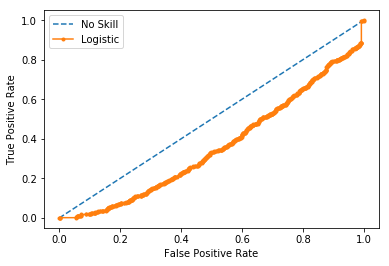

In [85]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = svclassifier.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [86]:
y_pred = svclassifier.predict(X_test_hold)

In [87]:
accuracy_score(y_test, y_pred)

0.495

In [88]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 58 142]
 [ 60 140]]
              precision    recall  f1-score   support

           0       0.49      0.29      0.36       200
           1       0.50      0.70      0.58       200

    accuracy                           0.49       400
   macro avg       0.49      0.49      0.47       400
weighted avg       0.49      0.49      0.47       400



In [89]:
# hyper_params = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear']}

# results = {}
# best_val = -1

# for g in [1, 10, 100, 1000]:
#     for c in [1, 10, 100, 1000]:
#         for d in [3,4,5]:
#             #g = random.randint(100, 1000)
#             #c = random.randint(100, 1000)
#             #d = random.randint(1,5)
#             print(g, c, d)
#             svclassifier = SVC(kernel='rbf', random_state=42, gamma=g, C=c, degree=d, probability=True)
#             svclassifier.fit(X, y_train)
#             # Predict on the validation set
#             y_pred = svclassifier.predict(X_test)
#             val_acc = accuracy_score(y_test, y_pred)
#             print('Validation accuracy: ', val_acc)

#             if val_acc > best_val:
#                 best_val = val_acc
#                 best_net = svclassifier

In [90]:
from sklearn.decomposition import PCA

In [92]:
pca = PCA(n_components=5)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % sum(fit.explained_variance_ratio_))

X_pca = pca.transform(X)
X_test_pca = pca.transform(X_test_hold)

best_val = -1

for g in [1, 10, 100, 1000]:
    for c in [1, 10, 100, 1000]:
        for d in [3,4,5]:
            print(g, c, d)
            svclassifier = SVC(kernel='rbf', random_state=42, gamma=g, C=c, degree=d, probability=True)
            svclassifier.fit(X_pca, y_train)
            # Predict on the validation set
            y_pred = svclassifier.predict(X_test_pca)
            val_acc = accuracy_score(y_test, y_pred)
            print('Validation accuracy: ', val_acc)

            if val_acc > best_val:
                best_val = val_acc
                best_net = svclassifier

Explained Variance: 0.925944998692134
1 1 3
Validation accuracy:  0.5
1 1 4
Validation accuracy:  0.5
1 1 5
Validation accuracy:  0.5
1 10 3
Validation accuracy:  0.5025
1 10 4
Validation accuracy:  0.5025
1 10 5
Validation accuracy:  0.5025
1 100 3
Validation accuracy:  0.4975
1 100 4
Validation accuracy:  0.4975
1 100 5
Validation accuracy:  0.4975
1 1000 3
Validation accuracy:  0.495
1 1000 4
Validation accuracy:  0.495
1 1000 5
Validation accuracy:  0.495
10 1 3
Validation accuracy:  0.5025
10 1 4
Validation accuracy:  0.5025
10 1 5
Validation accuracy:  0.5025
10 10 3
Validation accuracy:  0.505
10 10 4
Validation accuracy:  0.505
10 10 5
Validation accuracy:  0.505
10 100 3
Validation accuracy:  0.49
10 100 4
Validation accuracy:  0.49
10 100 5
Validation accuracy:  0.49
10 1000 3
Validation accuracy:  0.4825
10 1000 4
Validation accuracy:  0.4825
10 1000 5
Validation accuracy:  0.4825
100 1 3
Validation accuracy:  0.5025
100 1 4
Validation accuracy:  0.5025
100 1 5
Validation ac

In [78]:
# pca = PCA(n_components=30)
# fit = pca.fit(X)
# # summarize components
# print("Explained Variance: %s" % sum(fit.explained_variance_ratio_))

# X_pca = pca.transform(X)
# svclassifier = SVC(kernel='rbf', random_state=42, gamma=10, C=10, degree=3, probability=True)
# svclassifier.fit(X_pca, y_train)

print(confusion_matrix(y_train, best_net.predict(X_pca)))
print(classification_report(y_train, best_net.predict(X_pca)))

[[365 435]
 [294 506]]
              precision    recall  f1-score   support

           0       0.55      0.46      0.50       800
           1       0.54      0.63      0.58       800

    accuracy                           0.54      1600
   macro avg       0.55      0.54      0.54      1600
weighted avg       0.55      0.54      0.54      1600



In [79]:
# y_pred = []

# for i in range(len(y_test)):
#     if i < len(y_test)//2:
#         y_pred.append(0)
#     else:
#         y_pred.append(1)

In [80]:
X_test_pca = pca.transform(X_test_hold)
y_pred = best_net.predict(X_test_pca)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 78 122]
 [ 73 127]]
              precision    recall  f1-score   support

           0       0.52      0.39      0.44       200
           1       0.51      0.64      0.57       200

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.51      0.51      0.51       400



In [81]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,